In [1]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"

import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

In [9]:
sc.set_figure_params(dpi=50,dpi_save=600, figsize=(7, 7))

In [5]:
adata = sc.read_h5ad('../data/pbmc.virus.refine.7.h5ad')
adata

AnnData object with n_obs × n_vars = 1080252 × 12753
    obs: 'dataset', 'patients', 'patients_time', 'sex', 'age', 'tissue', 'Health', 'majorType', 'sampleID', 'patient_state', 'sample_state', 'BCR_ID', 'TCR_ID', 'state', 'celltype', 'source', 'n_genes', 'louvain_0.5', 'louvain_celltype', 'louvain_majorType', 'inflammatory', 'cytokine', 'louvain_celltype_index', 'louvain_celltype_index_name', 'inflammatory_cytokine'
    var: 'gene_name-covid19'
    uns: 'dataset_colors', 'leiden', 'louvain', 'louvain_celltype_colors', 'louvain_celltype_index_colors', 'louvain_celltype_index_name_colors', 'louvain_majorType_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_tsne', 'X_umap'

#### 细胞类型绘图

In [43]:
new_colors = ['#FFE4B5', '#FFA500', '#DAA520', '#FFD700',  # 0-3 
              '#F05050', '#FF7F50','#FF69B4', '#FFC0CB','#D2691E',  # 4-8 #FF4500
              '#F08080', '#B22222', '#DC143C','#FF0000',  # 9-12
              '#EEB3EA', '#C46DA0','#910080', '#4B0082',   # 13-16 
              '#32C3C8','#87CEEB','#538BE9','#1E90FF', # 17-20 
              '#AFEEEE','#00008B', '#5F9EA0',  # 21-23 
              '#228B22', '#32CD32', '#808000', '#8c564b'  # 24-27
             ]
len(set(new_colors))

28

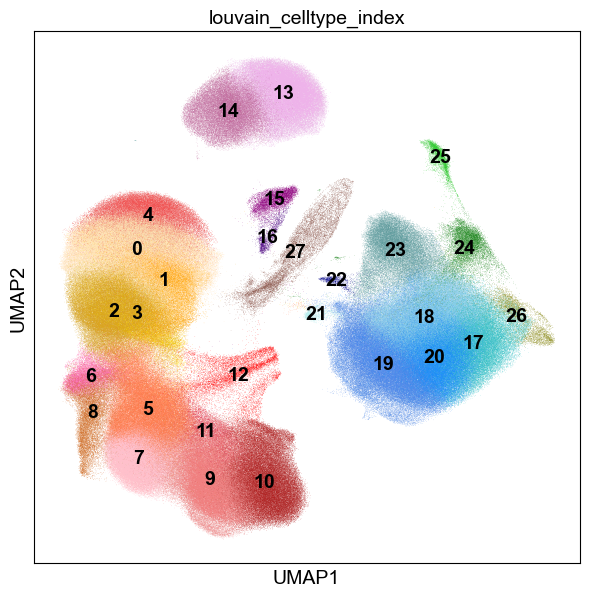

In [44]:
sc.pl.umap(adata, color='louvain_celltype_index', palette=new_colors, legend_loc='on data',size=0.35
           ,save='.cluster.annotation.on_data.1.pdf'
          )

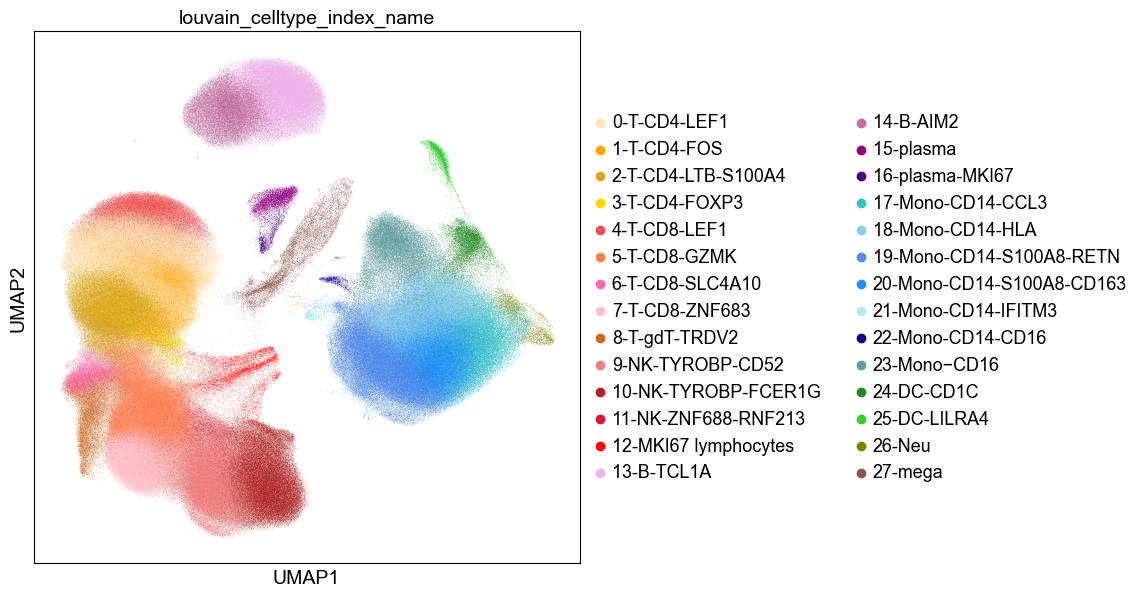

In [45]:
sc.pl.umap(adata, color='louvain_celltype_index_name', palette=new_colors,size=0.35
           ,save='.cluster.annotation.name.pdf'
          )

In [6]:
new_colors2 = [
    '#FFA500','#FF7F50', '#D2691E', '#B22222', '#FF0000', '#800080', '#EEB3EA', '#539ecd', '#228B22', '#808000', '#8c564b'
]

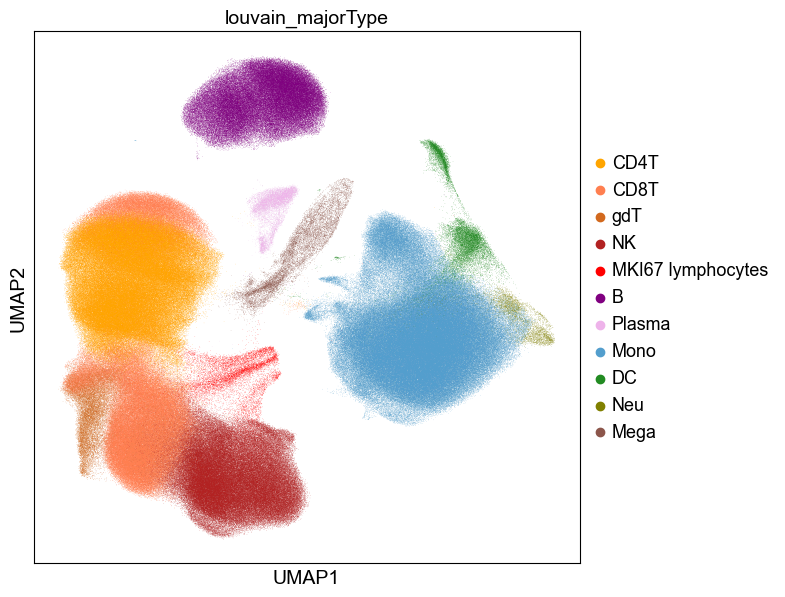

In [7]:
sc.pl.umap(adata, color='louvain_majorType', palette=new_colors2,size=0.35
           ,save='.cluster.annotation.majorType.pdf'
          )

#### 分开画数据集

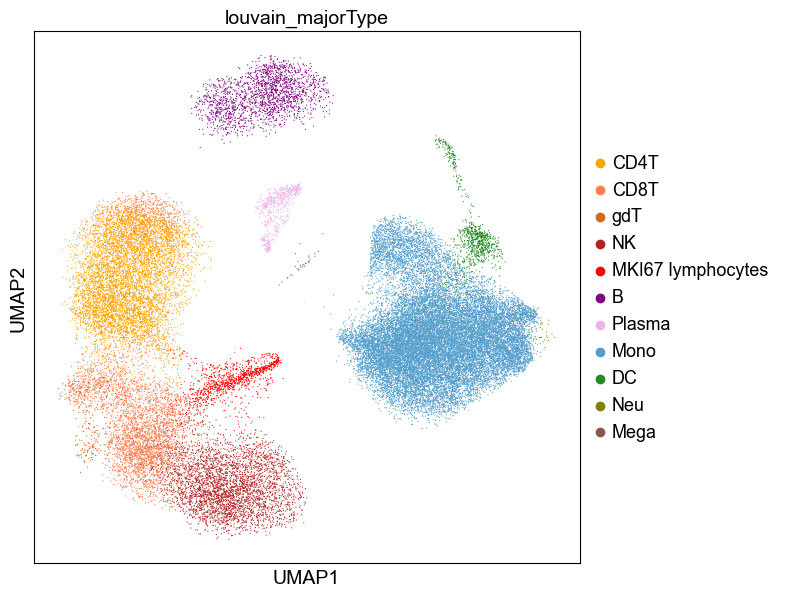

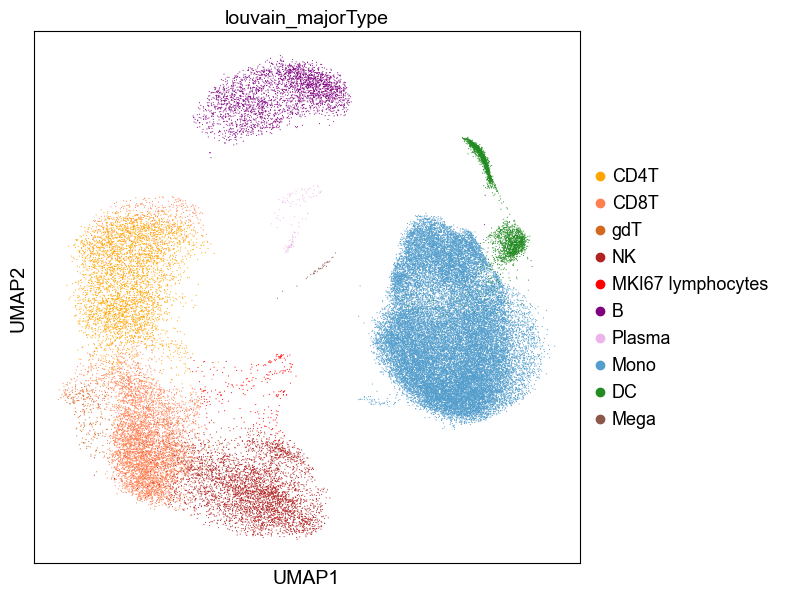

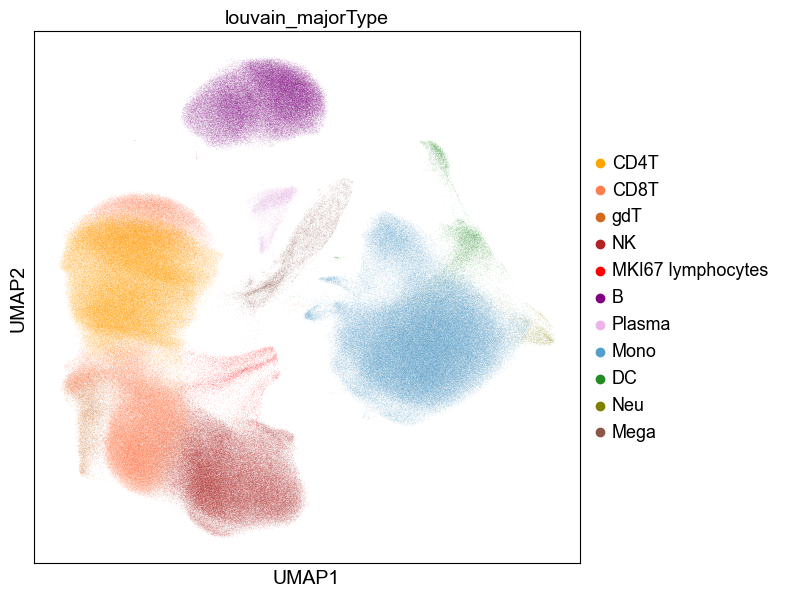

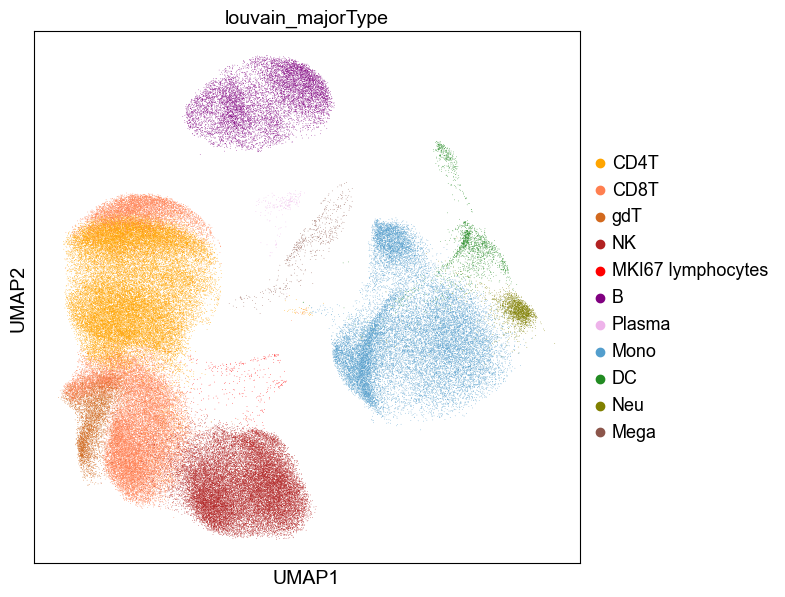

In [10]:
for item in ['HIV', 'Sepsis', 'Covid19', 'Control']:
    tmp_anndata = adata[adata.obs.source==item, :]
    sc.pl.umap(tmp_anndata, color='louvain_majorType',save='.dataset.{0}.pdf'.format(item))

#### 画markers

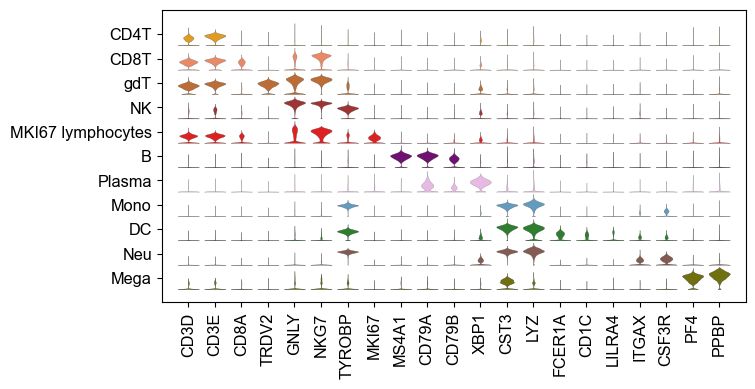

In [28]:
marker_genes=[
    'CD3D','CD3E','CD8A','TRDV2','GNLY','NKG7','TYROBP','MKI67','MS4A1',
    'CD79A','CD79B','XBP1','CST3','LYZ','FCER1A','CD1C','LILRA4','ITGAX',
    'CSF3R','PF4','PPBP']
sc.pl.stacked_violin(adata, marker_genes, groupby='louvain_majorType',
                     row_palette=adata.uns['louvain_majorType_colors']
                     , save='.marker.majorType.pdf'
                    )

In [49]:
new_colors = ['#FFE4B5', '#FFA500', '#DAA520', '#FFD700',  # 0-3 
              '#F05050', '#FF7F50','#FF69B4', '#FFC0CB','#D2691E',  # 4-8 #FF4500
              '#F08080', '#B22222', '#DC143C','#FF0000',  # 9-12
              '#EEB3EA', '#C46DA0','#910080', '#4B0082',   # 13-16 
              '#32C3C8','#87CEEB','#538BE9','#1E90FF', # 17-20 
              '#AFEEEE','#00008B', '#5F9EA0',  # 21-23 
              '#228B22', '#32CD32', '#808000', '#8c564b'  # 24-27
             ]
len(set(new_colors))

28

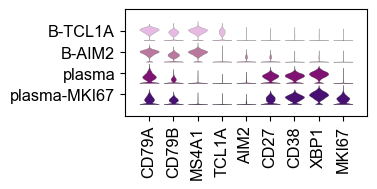

In [50]:
adata_sub=adata[adata.obs['louvain_celltype'].isin(['B-AIM2','B-TCL1A','plasma','plasma-MKI67']),:]

marker_genes=['CD79A','CD79B','MS4A1','TCL1A','AIM2','CD27','CD38','XBP1','MKI67']
sc.pl.stacked_violin(adata_sub, marker_genes, groupby='louvain_celltype', 
                     row_palette=list(adata_sub.uns['louvain_celltype_index_colors']),
                     save='markers.B.pdf'
                    )

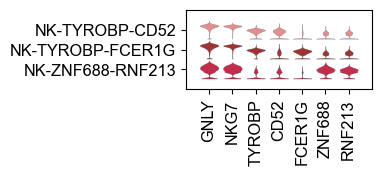

In [51]:
adata_sub=adata[adata.obs['louvain_celltype'].isin(['NK-TYROBP-CD52','NK-TYROBP-FCER1G','NK-ZNF688-RNF213']),:]

marker_genes=['GNLY','NKG7','TYROBP','CD52','FCER1G','ZNF688','RNF213']  # NCAM1
sc.pl.stacked_violin(adata_sub, marker_genes, groupby='louvain_celltype',
                     row_palette=list(adata_sub.uns['louvain_celltype_index_colors']),
                     save='markers.NK.pdf')

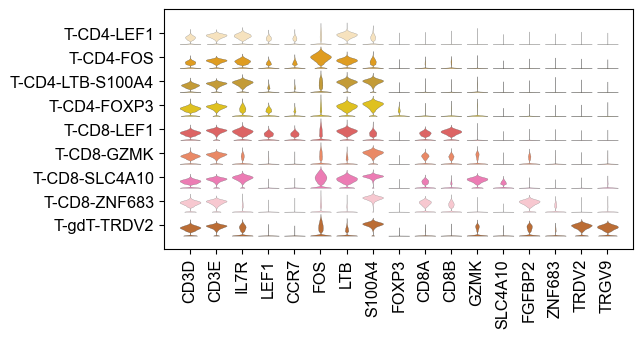

In [52]:
celltypes=['T-CD4-LEF1','T-CD4-FOS','T-CD4-LTB-S100A4','T-CD4-FOXP3',
   'T-CD8-LEF1','T-CD8-GZMK','T-CD8-SLC4A10','T-CD8-ZNF683','T-gdT-TRDV2']

adata_sub=adata[adata.obs['louvain_celltype'].isin(celltypes),:]

marker_genes=['CD3D','CD3E','IL7R','LEF1','CCR7','FOS','LTB','S100A4','FOXP3',  # 'CD69','RTKN2','IL2RA','SELL','GZMA','GZMH','CCL5','NKG7'
              'CD8A','CD8B','GZMK','SLC4A10','FGFBP2','ZNF683','TRDV2','TRGV9']
sc.pl.stacked_violin(adata_sub, marker_genes, groupby='louvain_celltype', 
                     row_palette=list(adata_sub.uns['louvain_celltype_index_colors']),
                     save='markers.T.pdf')

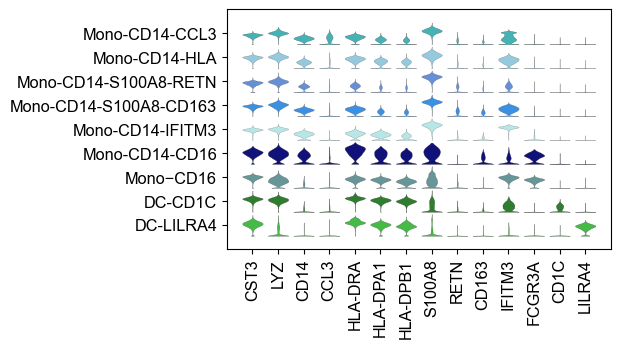

In [53]:
celltypes=['Mono-CD14-CCL3','Mono-CD14-CD16','Mono-CD14-HLA','Mono-CD14-IFITM3',
           'Mono-CD14-S100A8-CD163','Mono-CD14-S100A8-RETN','Mono−CD16',
           'DC-CD1C','DC-LILRA4']
adata_sub=adata[adata.obs['louvain_celltype'].isin(celltypes),:]
marker_genes=['CST3','LYZ','CD14','CCL3','HLA-DRA','HLA-DPA1','HLA-DPB1','S100A8',
              'RETN','CD163','IFITM3','FCGR3A','CD1C','LILRA4']  # ,'ITGAX','CSF3R','PF4','PPBP','IL1B','S100A9','ZNF688','IFITM1','FCER1A'
sc.pl.stacked_violin(adata_sub, marker_genes, groupby='louvain_celltype', 
                     row_palette=list(adata_sub.uns['louvain_celltype_index_colors']),
                     save='markers.Myeloid.pdf')

In [55]:
adata.write('../data/pbmc.virus.refine.7.h5ad')